# 4. Stitch outputs together
- Once you have fitted the weak, medium and dense diads, stitch them all together, and apply the Ne correction model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import DiadFit as pf
pf.__version__

'0.0.78'

In [2]:
# Load in settings, paths, file extensions etc. that you saved in step 1
meta_path, spectra_path, filetype, prefix, prefix_str, file_ext, TruPower=pf.get_settings()

## Load in specra, and combine

In [3]:
import os
df2=pf.merge_fit_files(path=os.getcwd())
df2.head()

,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,HB2_Sigma,C13_Cent,C13_Area,C13_Sigma,Diad2_Gauss_Cent,Diad2_Gauss_Area,Diad2_Gauss_Sigma,Diad1_Gauss_Cent,Diad1_Gauss_Area,Diad1_Gauss_Sigma
0,LL4-FI5-rep1_CRR_DiadFit,103.704588,0.005598,1284.031599,0.005148,629.551009,1284.031649,1559.705423,0.910326,3.928495,...,1.186710,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,LL4-FI6,103.322543,0.005281,1284.999416,0.004909,708.709163,1284.999466,1102.458889,0.576445,4.819073,...,0.752911,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,LL4-FI7-#1_CRR_DiadFit,103.203321,0.018028,1285.502744,0.015415,196.573271,1285.502744,227.007062,0.449657,3.849392,...,0.491918,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,LL4-FI7-#2,103.177872,0.009008,1285.508380,0.007889,201.257452,1285.508380,236.078207,0.468483,2.375790,...,0.503071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,LL4-FI7-#3-cosmicrays_CRR_DiadFit,103.120422,0.016265,1285.561558,0.013768,128.965173,1285.561558,146.370115,0.466035,2.535906,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## First, get the metadata for this day

In [4]:
# Put the common string you can in all your Ne lines here
diad_meta=pf.get_files(path=meta_path,
file_ext=file_ext, exclude_str=['Ne', 'FG', 'Cap','window'],
 sort=True)
diad_meta[0]

'001 LL4-FI5stitch-IMG.txt'

## Now get all the important information out of the metadata files

In [5]:
# This will only work for WITEC - for other vendors, you might have to use the file datastamp. See the HORIBA example
meta=pf.stitch_metadata_in_loop_witec(path=meta_path, 
Allfiles=diad_meta, prefix=prefix, str_prefix=prefix_str,
trupower=TruPower)
meta.head()

100%|██████████| 86/86 [00:00<00:00, 111.19it/s]

Done


,filename,date,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,LL4-FI5-rep1.txt,"October 17, 2022\n",October,17.0,5.995,45.0,5.0,50.0,"['0h', '3m', '46s']",10:27:26 AM\n,37646.0,1325.004
1,LL4-FI6.txt,"October 17, 2022\n",October,17.0,11.962,45.0,5.0,50.0,"['0h', '3m', '47s']",10:50:05 AM\n,39005.0,1325.004
2,LL4-FI7-#1.txt,"October 17, 2022\n",October,17.0,12.058,45.0,5.0,50.0,"['0h', '3m', '47s']",11:52:31 AM\n,42751.0,1325.004
3,LL4-FI7-#2.txt,"October 17, 2022\n",October,17.0,5.994,45.0,5.0,50.0,"['0h', '3m', '47s']",12:04:03 PM\n,43443.0,1325.004
4,LL4-FI7-#3-cosmicrays.txt,"October 17, 2022\n",October,17.0,12.002,45.0,4.0,50.0,"['0h', '3m', '32s']",12:12:45 PM\n,43965.0,1325.004


## Then get a simple file name you can stitch with the spectra

In [6]:
file_m=pf.extracting_filenames_generic(names=meta['filename'],
   file_ext=file_ext)
# Checks they are all unique
file_m[0]

good job, no duplicate file names


'LL4-FI5-rep1'

## Now get filename from spectra into same form as metadata

In [7]:
# Remove these to get the pure file name
file_s=pf.extracting_filenames_generic(
    names=df2['filename'].reset_index(drop=True),
   file_ext=file_ext)

# Remove the cosmic rays, as doesnt have it in the metatdata
file_s = np.char.replace(file_s.astype(str), "_CRR_DiadFit", "")
print(file_s[0])

good job, no duplicate file names
LL4-FI5-rep1


In [8]:
# Combining them together, if the form above matches, e.g. checking one doesnt have a suffix and the other one does

meta['filename']=file_m
df2['filename']=file_s
df_combo=pd.merge(df2, meta, on='filename').reset_index(drop=True)
df_combo.head()

,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,LL4-FI5-rep1,103.704588,0.005598,1284.031599,0.005148,629.551009,1284.031649,1559.705423,0.910326,3.928495,...,October,17.0,5.995,45.0,5.0,50.0,"['0h', '3m', '46s']",10:27:26 AM\n,37646.0,1325.004
1,LL4-FI6,103.322543,0.005281,1284.999416,0.004909,708.709163,1284.999466,1102.458889,0.576445,4.819073,...,October,17.0,11.962,45.0,5.0,50.0,"['0h', '3m', '47s']",10:50:05 AM\n,39005.0,1325.004
2,LL4-FI7-#1,103.203321,0.018028,1285.502744,0.015415,196.573271,1285.502744,227.007062,0.449657,3.849392,...,October,17.0,12.058,45.0,5.0,50.0,"['0h', '3m', '47s']",11:52:31 AM\n,42751.0,1325.004
3,LL4-FI7-#2,103.177872,0.009008,1285.508380,0.007889,201.257452,1285.508380,236.078207,0.468483,2.375790,...,October,17.0,5.994,45.0,5.0,50.0,"['0h', '3m', '47s']",12:04:03 PM\n,43443.0,1325.004
4,LL4-FI7-#3-cosmicrays,103.120422,0.016265,1285.561558,0.013768,128.965173,1285.561558,146.370115,0.466035,2.535906,...,October,17.0,12.002,45.0,4.0,50.0,"['0h', '3m', '32s']",12:12:45 PM\n,43965.0,1325.004


## If you have secondary phases, now is the time to merge those in

In [9]:
df_combo_sec_phase=pf.merge_in_carb_SO2(
df_combo=df_combo, file1_name='Carb_Peak_fits.xlsx', file2_name='SO2_Peak_fits.xlsx', 
prefix=prefix, str_prefix=prefix_str, file_ext=file_ext)
#df_combo_sec_phase.to_excel('FI_fitting_w_sec_phases.xlsx', index=False)

Made a df!
good job, no duplicate file names


## If you have SO2, now is the time to calculate the molar proportion of SO2

In [10]:
if 'Peak_Area_SO2' in df_combo_sec_phase:
    SO2_ratio=pf.calculate_CO2_SO2_ratio(peak_area_SO2=df_combo_sec_phase['Peak_Area_SO2'], 
peak_area_diad1=df_combo_sec_phase['Diad1_Voigt_Area'], peak_area_diad2=df_combo_sec_phase['Diad2_Voigt_Area'],
wavelength=532.067, T_K=37+273.15, efficiency_SO2=1, efficiency_CO2=0.5, 
sigma_SO2=4.03, sigma_CO2_v1=0.8, sigma_CO2_v2=1.23)
    df_combo_sec_phase['SO2_mol_ratio']=SO2_ratio['SO2']

## Now we calculate the density using the UC Berkeley Densimeter. 
- If you have your own densimeter, I am happy to add a function for it if you email me (penny_wieser@berkeley.edu)
- This particular function propagates the uncertainty on 1) The neon line correction model 2) the peak fits of the diads themselves 3) The densimeter. 

In [11]:
df=pf.calculate_density_ucb(df_combo=df_combo_sec_phase,
  Ne_pickle_str='Neon_corr_model.pkl',  temp='SupCrit', CI_split=0.67, CI_neon=0.67)
df.head()

4.749561630104794e-06


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,Peak_Cent_SO2,Peak_Area_SO2,Peak_Height_SO2,Model_name,SO2_Diad_Ratio,SO2_mol_ratio,time,preferred_values,lower_values,upper_values
0,LL4-FI5-rep1,0.297678,0.003345,0.002378,0.002352,103.477912,0.005609,0.000509,0.005598,5.995,...,1149.884659,122.750225,76.089186,Spline,0.030777,0.7,37646.0,0.997814,0.997809,0.997819
1,LL4-FI6,0.137226,0.004396,0.002097,0.003864,103.096575,0.005293,0.000500,0.005281,11.962,...,1150.297622,222.569248,157.275217,Spline,0.082339,1.9,39005.0,0.997813,0.997808,0.997818
2,LL4-FI7-#1,0.089567,0.008080,0.007130,0.003801,102.976297,0.017995,0.000487,0.018028,12.058,...,NaN,NaN,NaN,NaN,NaN,NaN,42751.0,0.997800,0.997796,0.997805
3,LL4-FI7-#2,0.079359,0.005214,0.003567,0.003803,102.950536,0.009002,0.000485,0.009008,5.994,...,1150.681087,56.357241,44.727223,Spline,0.096546,2.3,43443.0,0.997797,0.997792,0.997801
4,LL4-FI7-#3-cosmicrays,0.056528,0.007485,0.006433,0.003826,102.892915,0.016236,0.000484,0.016265,12.002,...,1150.799077,30.656122,20.798896,Spline,0.081832,1.9,43965.0,0.997794,0.997789,0.997798


### This cell saves the merged together dataframe with the folder name and the date you fitted it

In [12]:

from datetime import date
today = date.today()
today_str = today.strftime("%Y-%m-%d")
sorted_df = df.sort_values('sec since midnight')
date=meta['date'].iloc[0].replace('\n', '')
name='Raman_session_'+date+'_fitted_'+today_str+'.xlsx'
print(name)
sorted_df.to_excel(name)

Raman_session_October 17, 2022_fitted_2023-11-29.xlsx


## This helps visualize the errors on each spectra 

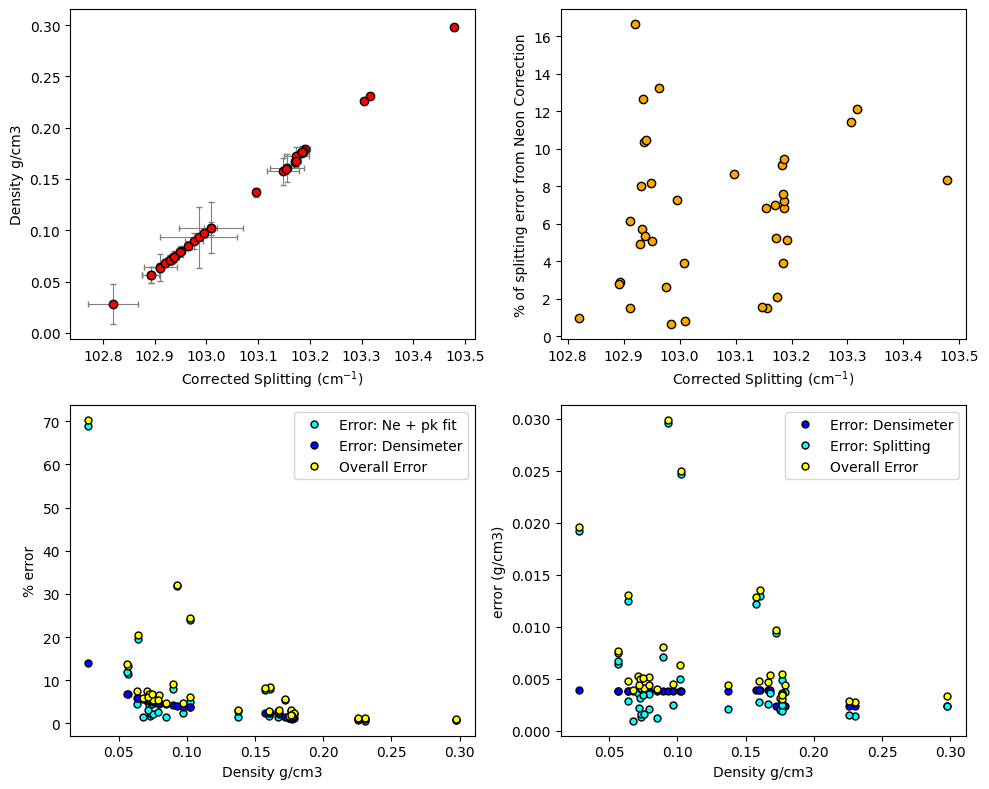

In [13]:
df=sorted_df
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,8))
df=df.loc[df['Density g/cm3']>0]
ax1.errorbar(df['Corrected_Splitting'], df['Density g/cm3'],
xerr=df['Corrected_Splitting_σ'], yerr=df['σ Density g/cm3'],
fmt='o', ecolor='grey', elinewidth=0.8, mfc='red', ms=6, mec='k', capsize=2)
ax1.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax1.set_ylabel('Density g/cm3')

ax2.plot(df['Corrected_Splitting'], 
100*df['Corrected_Splitting_σ_Ne']/(df['Corrected_Splitting_σ_Ne']+df['Corrected_Splitting_σ_peak_fit']),
 'ok', mfc='orange')
ax2.set_ylabel('% of splitting error from Neon Correction')
ax2.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3 (from Ne+peakfit)']/df['Density g/cm3'], 
'ok', mfc='cyan', ms=5, label='Error: Ne + pk fit')


ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3 (from densimeter)']/df['Density g/cm3'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')

ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3']/df['Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax3.set_ylabel('% error')
ax3.set_xlabel('Density g/cm3')
ax3.legend()

ax4.plot(df['Density g/cm3'], df['σ Density g/cm3 (from densimeter)'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')
ax4.plot(df['Density g/cm3'], df['σ Density g/cm3 (from Ne+peakfit)'], 
'ok', mfc='cyan', ms=5, label='Error: Splitting')
ax4.plot(df['Density g/cm3'], df['σ Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax4.set_ylabel('error (g/cm3)')
ax4.set_xlabel('Density g/cm3')
ax4.legend()

fig.tight_layout()
plt.rcParams["pdf.fonttype"]=42
fig.savefig("FigS-refit_output.pdf")

In [19]:
df[df['σ Density g/cm3']>0.02]

,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,Peak_Cent_SO2,Peak_Area_SO2,Peak_Height_SO2,Model_name,SO2_Diad_Ratio,SO2_mol_ratio,time,preferred_values,lower_values,upper_values
9,LL4-FI7-#7,0.093149,0.029844,0.029601,0.003802,102.985338,0.074705,0.000481,0.074870,6.030,...,NaN,NaN,NaN,NaN,NaN,NaN,46107.0,0.997781,0.997776,0.997785
37,LL4-FI12-#2,0.102597,0.024958,0.024666,0.003807,103.009182,0.062250,0.000517,0.062392,12.054,...,1130.445901,22.12376,30.160357,Spline,0.020333,0.5,59978.0,0.997702,0.997697,0.997707


In [14]:
df.to_clipboard(excel=True)

## If you were analysing fluid inclusions, lets calculate their pressures
- This bit isn't valid for melt inclusion vapour bubbles. 

Text(0, 0.5, '# of FI')

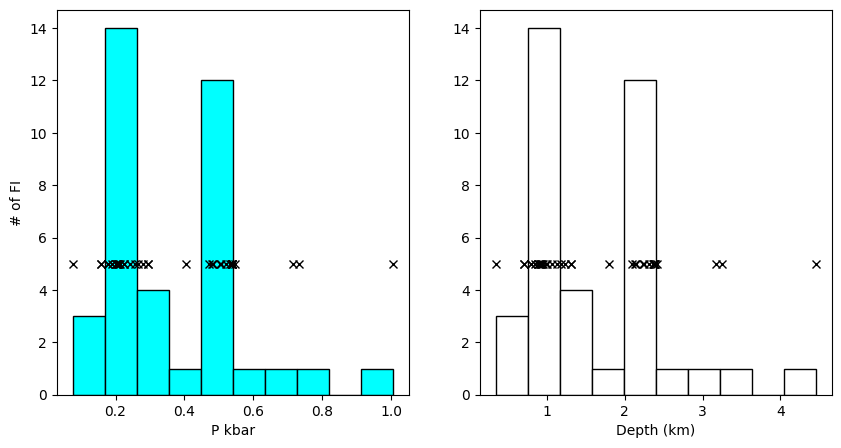

In [15]:
# Calculate pressure with a temperature estimate
Temp_C=1150
Pressure_SW96=pf.calculate_P_for_rho_T(T_K=Temp_C+273.15,
                CO2_dens_gcm3=df['Density g/cm3'],
                 EOS='SW96')
# Calculate depth from a crustal density assumption
Depth=pf.convert_pressure_to_depth(P_kbar=Pressure_SW96['P_kbar'], 
                crust_dens_kgm3=2300)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.hist(Pressure_SW96['P_kbar'], ec='k', fc='cyan', bins=10)
ax1.plot(Pressure_SW96['P_kbar'], Pressure_SW96['P_kbar']*0+5, 'xk')
ax2.plot(Depth, Pressure_SW96['P_kbar']*0+5, 'xk')
ax2.hist(Depth, ec='k', fc='white', bins=10)
ax1.set_xlabel('P kbar')
ax2.set_xlabel('Depth (km)')
ax1.set_ylabel('# of FI')